<a href="https://colab.research.google.com/github/KravtsovaAlyona/data_science_platform/blob/main/%D0%9B%D0%B0%D0%B13_%D0%9A%D1%80%D0%B0%D0%B2%D1%86%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Студент: Кравцова А.Е
Почта: KravtsovaAE@mgpu.ru

**Задача 3.1.1.** Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл ad_viz_plotval_data.csv в каталоге задания.

Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

Pollutant = PM2.5
Year = 2023
City = Salt Lake City, UT
Monitor Site = All Sites

**Задача 3.1.2.** Импорт данных. Предобработка данных
Перед выполнением задания необходимо импортировать библиотеки: pandas,matplotlib, seaborn, numpy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import probplot

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv
User uploaded file "ad_viz_plotval_data.csv" with length 1330103 bytes


In [3]:
df=pd.read_csv('ad_viz_plotval_data.csv')
df

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,12/27/2023,AQS,490450004,3,15.5,ug/m3 LC,58,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6510,12/28/2023,AQS,490450004,3,17.6,ug/m3 LC,63,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6511,12/29/2023,AQS,490450004,3,19.3,ug/m3 LC,66,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6512,12/30/2023,AQS,490450004,3,26.6,ug/m3 LC,81,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780


После создания датафрейма необходимо выяснить типы данных.Столбец с датой-объект, с таким типом данных не получится работать. Необходимо преобразовать его в тип дата

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

In [5]:
#преобразование даты в тип дата
df1=df
df1['Date'] = df1['Date'].astype('datetime64[ns]')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

In [6]:
df1.isnull().sum() #нулевые значения отсутсвуют

Date                              0
Source                            0
Site ID                           0
POC                               0
Daily Mean PM2.5 Concentration    0
UNITS                             0
DAILY_AQI_VALUE                   0
Site Name                         0
DAILY_OBS_COUNT                   0
PERCENT_COMPLETE                  0
AQS_PARAMETER_CODE                0
AQS_PARAMETER_DESC                0
CBSA_CODE                         0
CBSA_NAME                         0
STATE_CODE                        0
STATE                             0
COUNTY_CODE                       0
COUNTY                            0
SITE_LATITUDE                     0
SITE_LONGITUDE                    0
dtype: int64

In [7]:
df1.describe()

,Date,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,6514,6.514000e+03,6514.000000,6514.000000,6514.000000,6514.0,6514.0,6514.0,6514.0,6514.0,6514.000000,6514.000000,6514.000000
mean,2023-07-02 03:03:28.903899392,4.903637e+08,2.171323,7.243921,28.064784,1.0,100.0,88101.0,41620.0,49.0,36.105312,40.685918,-111.987452
min,2023-01-01 00:00:00,4.903520e+08,1.000000,-0.500000,0.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.496392,-112.355780
25%,2023-04-02 00:00:00,4.903530e+08,1.000000,3.800000,16.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.600550,-112.036298
50%,2023-07-02 00:00:00,4.903530e+08,2.000000,5.700000,24.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.709762,-111.931000
75%,2023-10-01 00:00:00,4.903530e+08,3.000000,7.900000,33.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.777145,-111.894167
max,2023-12-31 00:00:00,4.904500e+08,5.000000,52.600000,143.000000,1.0,100.0,88101.0,41620.0,49.0,45.000000,40.807897,-111.872222
std,NaN,3.041880e+04,1.259437,6.279512,19.298589,0.0,0.0,0.0,0.0,0.0,3.135747,0.097821,0.143387


Сбор описательной статистики о концентрации PM2,5

In [8]:
df1['Daily Mean PM2.5 Concentration'].describe()

count    6514.000000
mean        7.243921
std         6.279512
min        -0.500000
25%         3.800000
50%         5.700000
75%         7.900000
max        52.600000
Name: Daily Mean PM2.5 Concentration, dtype: float64

In [9]:
df1['Daily Mean PM2.5 Concentration'].median()

5.7

In [10]:
df1['Daily Mean PM2.5 Concentration'].std()

6.279512287452537

Сбор описательной статистики об уровне AQI

In [11]:
df1['DAILY_AQI_VALUE'].describe()

count    6514.000000
mean       28.064784
std        19.298589
min         0.000000
25%        16.000000
50%        24.000000
75%        33.000000
max       143.000000
Name: DAILY_AQI_VALUE, dtype: float64

In [12]:
df1['DAILY_AQI_VALUE'].median()

24.0

In [13]:
df1['DAILY_AQI_VALUE'].std()

19.29858902513184

Посмотрим график распредления вероятности концентрации

---



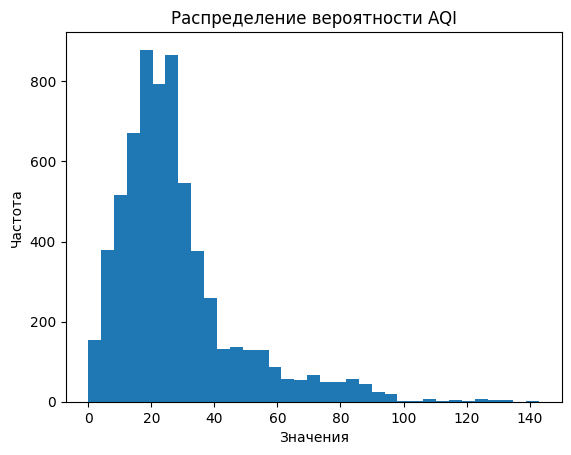

In [14]:
plt.hist(df1['DAILY_AQI_VALUE'], bins=35)
plt.title('Распределение вероятности AQI')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

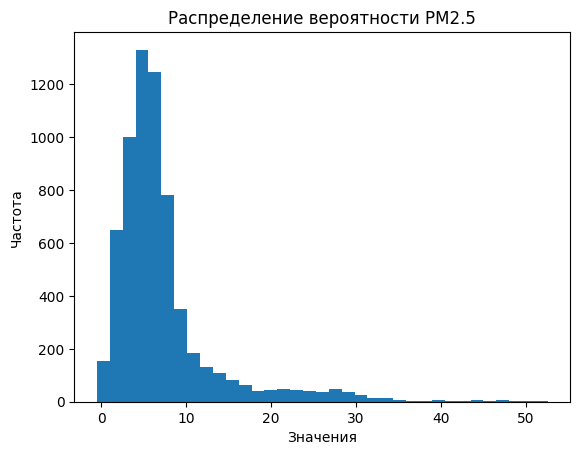

In [15]:
plt.hist(df1['Daily Mean PM2.5 Concentration'], bins=35)
plt.title('Распределение вероятности PM2.5')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

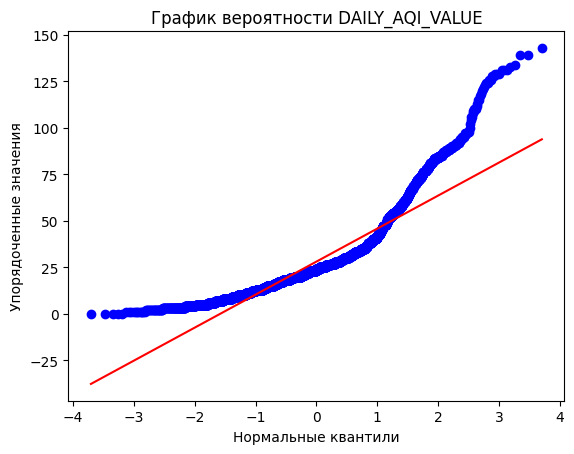

In [16]:
probplot(df1['DAILY_AQI_VALUE'], plot=plt)
plt.title("График вероятности DAILY_AQI_VALUE")
plt.xlabel("Нормальные квантили")
plt.ylabel("Упорядоченные значения")
plt.show()

По графику распределения вероятности AQI видно, что нормальное распределение отсуствует

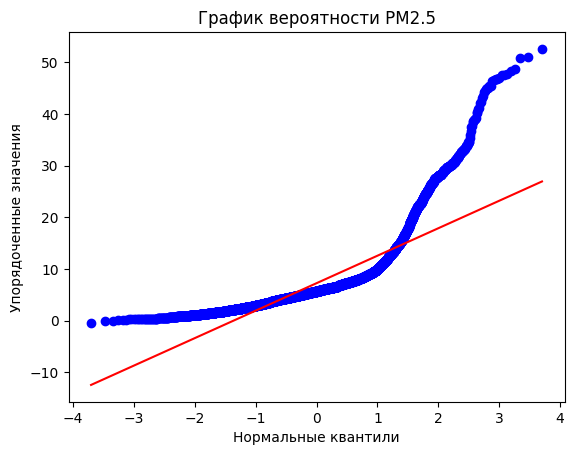

In [17]:
probplot(df1['Daily Mean PM2.5 Concentration'], plot=plt)
plt.title("График вероятности PM2.5")
plt.xlabel("Нормальные квантили")
plt.ylabel("Упорядоченные значения")
plt.show()

Аналогично, ненормальное распределение

**Задача 3.1.3.** Визуализация данных


Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS).


*1.Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.*

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

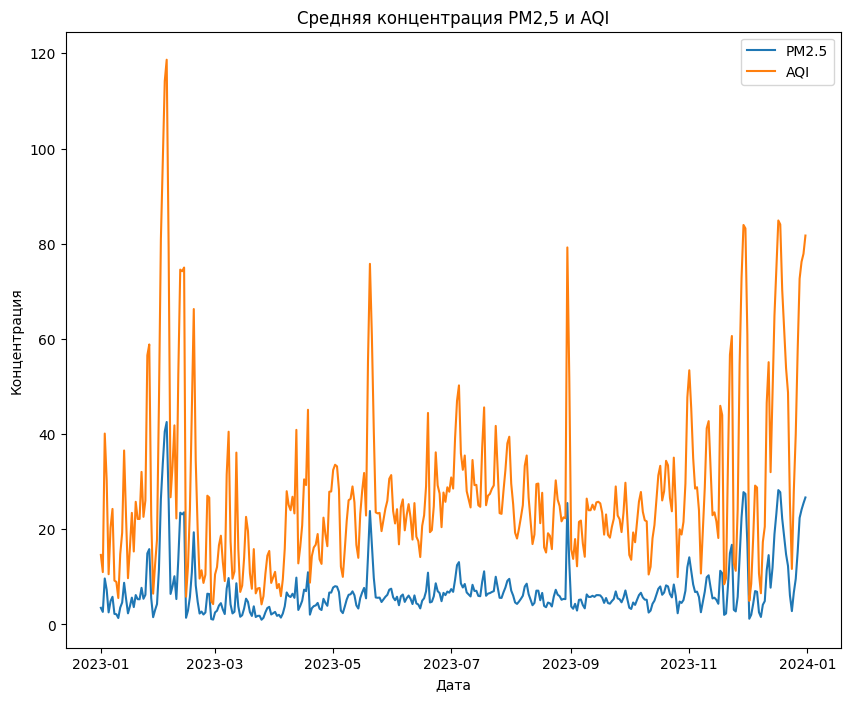

In [19]:
means=df1[['Date', 'DAILY_AQI_VALUE', 'Daily Mean PM2.5 Concentration']].groupby(by='Date').mean()
# Построение графика
plt.figure(figsize=(10,8))
plt.plot(means['Daily Mean PM2.5 Concentration'], label='PM2.5')
plt.plot(means['DAILY_AQI_VALUE'], label='AQI')
plt.title('Средняя концентрация PM2,5 и AQI')
plt.xlabel('Дата')
plt.ylabel('Концентрация')
plt.xlabel('Дата')
plt.legend()
plt.show()

*Наблюдение:*
По графику видно, что чем выше концентрация частиц PM2.5 тем хуже качество воздуха по шкале AQI

*2.Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Результаты для обоих участков должны быть на одном рисунке.*

In [20]:
#u1 содержит данные об участке 490352005, а u2 об участке 490353015
u1=df1[df1['Site ID']==490352005]
u2=df1[df1['Site ID']==490353015]
#создаю фреймы с группировкой по дате и poc
u1_grouped=u1.groupby(['Date','POC'])[('Daily Mean PM2.5 Concentration')].mean().reset_index()
u2_grouped=u2.groupby(['Date','POC'])[('Daily Mean PM2.5 Concentration')].mean().reset_index()

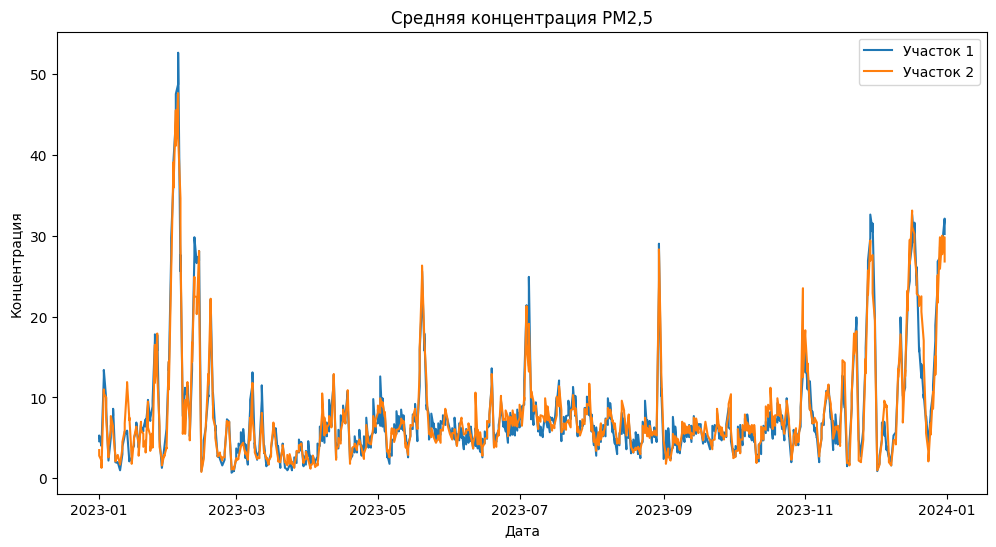

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(u1_grouped['Date'], u1_grouped['Daily Mean PM2.5 Concentration'], label='Участок 1')
plt.plot(u2_grouped['Date'], u2_grouped['Daily Mean PM2.5 Concentration'], label='Участок 2')
plt.title('Средняя концентрация PM2,5')
plt.xlabel('Дата')
plt.ylabel('Концентрация')
plt.legend()
plt.show()

Наблюдение: частота повышения частиц РМ2,5 в воздухе проявляется с переодичностью 2-3 месяца

**Задача 3.1.4**. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

In [22]:
sk=df1
#создаю новый датафрейм с группировкой по сайту (участку) и poc.С помощью rolling добавляю новый столбец,содержащий значение скользящего среднего. Выбрала 3 периода
sk_group=sk.groupby(['Site ID','POC'])[('DAILY_AQI_VALUE')].mean().reset_index()
sk_group['rolling_aqi'] = sk_group['DAILY_AQI_VALUE']. rolling (3).mean()
sk_group

,Site ID,POC,DAILY_AQI_VALUE,rolling_aqi
0,490352005,1,27.425000,NaN
1,490352005,4,32.405479,NaN
2,490353006,1,25.622535,28.484338
3,490353006,2,30.151515,29.393177
4,490353006,4,27.304709,27.692920
5,490353010,1,27.520776,28.325667
6,490353010,2,28.328729,27.718071
7,490353010,3,29.904110,28.584538
8,490353013,2,23.397260,27.210033
9,490353013,5,23.887671,25.729680


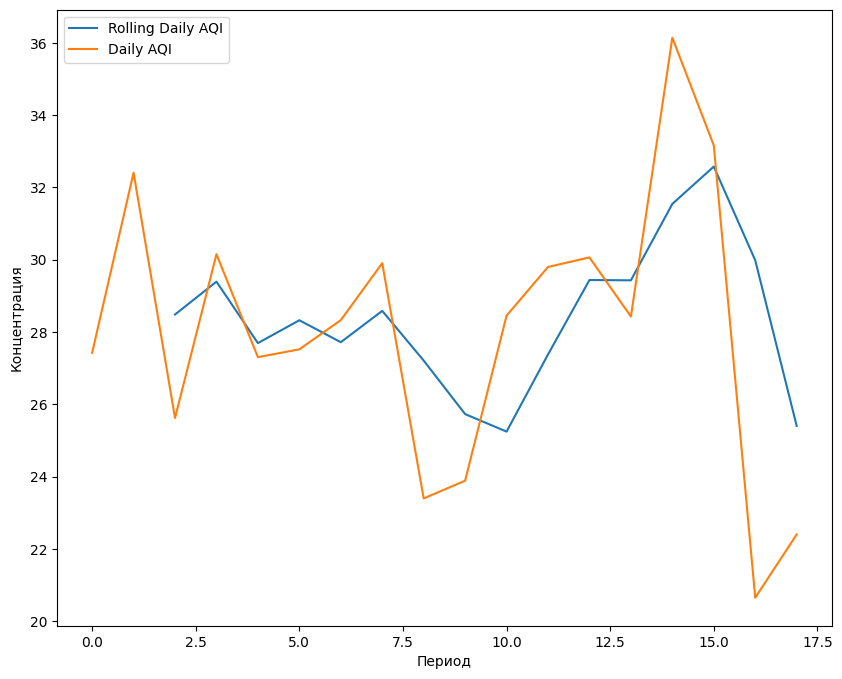

In [23]:
plt.figure(figsize=(10,8))
plt.plot(sk_group['rolling_aqi'], label='Rolling Daily AQI')
plt.plot(sk_group['DAILY_AQI_VALUE'], label='Daily AQI')
plt.legend()
plt.ylabel('Концентрация')
plt.xlabel('Период')
plt.show()

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

Нулевая гипотеза: **pA=pB** (доля кликов по логотипу А=доле кликов по логотипу Б),
Алтернативная гипотеза:  **pA!=pB**





In [24]:
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import probplot
from statsmodels. stats.proportion import proportions_ztest

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

In [32]:
#вычисления по формуле
na= 800
Na= 3000
nb= 1000
Nb= 3000
pA= na/ Na
pB= nb / Nb
p= ((Na/(Na+Nb))*pA)+((Nb/(Na+Nb))*pB)
q= 1 - p
z= (pA-pB)/np.sqrt(p*q*((1/Na)+(1/Nb)))
print(z)

-5.6343616981901095


### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [33]:
p0 = norm.cdf(z)
p0

8.785395076012362e-09

In [38]:
#запуск z-теста, выбираю уровеньо значимости α=0,01

from statsmodels. stats.proportion import proportions_ztest
proportions_ztest(count= np.array([nb, na]), nobs= np.array([Nb, Na]) , value = pB)


(-22.53744679276044, 1.783089820866435e-112)

**Вывод:** Результат z-теста показал, что статистика z равна -22,537, а соответствующее значение p равно 1,783.Поскольку это значение больше уровня значимости α=0,05, нельзя отвергнуть нулевую гипотезу. Нет достаточных доказательств, чтобы сказать, что логотип Б интереснее и  привлекательнее для пользоваттелей
